# Homework 5 - Optimization

***
**Name: Ganesh Chandra Satish**
**collaboration with: Rahul Chowdhury**
***

## Goal

The goal of this assignment is to use gradient based optimization algorithms to find the minum for the Rosenbrock function and to optmizie the 1 layer MLP network you built in **Assignment 4**.

## 1. Optimizing the Rosenbrock function

More information can be found here https://en.wikipedia.org/wiki/Rosenbrock_function
    
**Note: For this assignment, we will choose a = 1 and b = 100**

In [52]:
# Set random seed 
import random
import unittest
import math

random.seed(0)

In [5]:
def rosenbrock(a, b, x, y):
    """
    Inputs:
    a,b : parameters 
    x, y: inputs
    
    Outputs:
    out: Rosenbrock function evaluated at x and y
    """
    f_x_y = ((a - x) ** 2) + (b * ((y - (x  ** 2)) ** 2))
    return f_x_y


In [6]:
def rosenbrock_grad(a, b, x, y):
    """
    Calculate gradient of the rosenbrock function wrt x and y
    
    Inputs:
    a, b: parameters
    x, y: inputs
    
    Outputs:
    grad_x, grad_y: Gradients wrt x and y
    """
    
    grad_x = (-2 * (a - x)) - ((4 * b * x) * (y - (x ** 2)))
    grad_y = 2 * b * (y - (x ** 2))
    
    return (grad_x,grad_y)


Below, you are given skeleton code for optimizing the rosenbrock function using various update rules. Following each function, there are a few function calls with specific hyperparameter choices. The outputs for these will be used to grade your work.

Termination condition: 

1. Reached the n_epochs limit 

2. The change in value of the function at $x_t,y_t$ and $x_{t+1},y_{t+1}$ is <= tolerance 

All these functions share the same structure i.e apart from the update rule (and keeping track of past variables) very little changes across these functions.

Note: since there is no randomness involved, we expect the outputs to closely match those of our implementations.

In [31]:
def rosenbrock_sgd(initial_x, initial_y, a, b, n_epochs, lr, tolerance):
    """
    Use Vanilla SGD to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    for i in range(n_epochs):
        next_x = prev_x - (lr * grads[0])
        next_y = prev_y - (lr * grads[1])
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    

In [50]:
def rosenbrock_momentum(initial_x, initial_y, a, b, n_epochs, lr, mntm, nesterov, tolerance):
    """
    Use momentum to optimize the Rosenbrock function
    
    Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
        Instead, to simplify your implementation, you can use an alternative form of the nesterov 
        update which only uses the gradient at the current step.
        Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
        With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    mntm: momentum factor
    nesterov: True if nesterov update is to be used
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    vx = 0
    vy = 0
    next_x = 0
    next_y = 0
    for i in range(n_epochs):
        if nesterov == True:
            vx = lr * ((1 + mntm) * grads[0] + (mntm) ** 2 * vx)
            vy = lr * ((1 + mntm) * grads[1] + (mntm) ** 2 * vy)
        else:
            vx = lr * (grads[0] + mntm * vx)
            vy = lr * (grads[1] + mntm * vy)
        
        next_x = prev_x - vx
        next_y = prev_y - vy
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    

In [81]:
def rosenbrock_adagrad(initial_x, initial_y, a, b, n_epochs, lr, eps, tolerance):
    """
    Use Adagrad to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    eps: The fudge factor (used in the denominator of the update to reduce numerical instability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    rx = 0
    ry = 0
    next_x = 0
    next_y = 0
    for i in range(n_epochs):
        rx += grads[0] ** 2
        ry += grads[1] ** 2
        tx =  -(lr/(math.sqrt(eps + rx))) * grads[0]
        ty =  -(lr/(math.sqrt(eps + ry))) * grads[1]
        next_x = prev_x + tx
        next_y = prev_y + ty
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    

In [143]:
def rosenbrock_adadelta(initial_x, initial_y, a, b, n_epochs, rho, eps, tolerance):
    """
    Use Adadelta to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    rx = 0
    ry = 0
    drx = 0
    dry = 0
    next_x = 0
    next_y = 0
    for i in range(n_epochs):
        rx = rho * rx + (1 - rho) * grads[0] ** 2
        ry = rho * ry + (1 - rho) * grads[1] ** 2
        tx =  ((math.sqrt(eps + drx))/(math.sqrt(eps + rx))) * grads[0]
        ty =  ((math.sqrt(eps + dry))/(math.sqrt(eps + ry))) * grads[1]
        drx = rho * drx + (1 - rho) * tx ** 2
        dry = rho * dry + (1 - rho) * ty ** 2
        next_x = prev_x - tx
        next_y = prev_y - ty
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    
    

In [98]:
def rosenbrock_rmsprop(initial_x, initial_y, a, b, n_epochs, lr, rho, eps, tolerance):
    """
    Use RMSprop to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr:learning rate
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    rx = 0
    ry = 0
    next_x = 0
    next_y = 0
    for i in range(n_epochs):
        rx = (rho * rx) + ((1 - rho) * grads[0] ** 2)
        ry = (rho * ry) + ((1 - rho) * grads[1] ** 2)
        tx =  -(lr/(math.sqrt(eps + rx))) * grads[0]
        ty =  -(lr/(math.sqrt(eps + ry))) * grads[1]
        next_x = prev_x + tx
        next_y = prev_y + ty
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    

In [101]:
def rosenbrock_adam(initial_x, initial_y, a, b, n_epochs, lr, beta1, beta2, eps, tolerance):
    """
    Use Adam to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: learning rate
    beta1, beta2: Averaging factors
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    
    prev_x = initial_x
    prev_y = initial_y
    out_p = rosenbrock(a, b, prev_x, prev_y)
    grads = rosenbrock_grad(a, b, prev_x, prev_y)
    rx = 0
    ry = 0
    sx = 0
    sy = 0
    next_x = 0
    next_y = 0
    for i in range(n_epochs):
        sx = (beta1 * sx) + (1 - beta1) * grads[0]
        sy = (beta1 * sy) + (1 - beta1) * grads[1]
        rx = (beta2 * rx) + ((1 - beta2) * grads[0] ** 2)
        ry = (beta2 * ry) + ((1 - beta2) * grads[1] ** 2)
        sx_cap = sx / (1 - beta1 ** (i + 1))
        sy_cap = sy / (1 - beta1 ** (i + 1))
        rx_cap = rx / (1 - beta2 ** (i + 1))
        ry_cap = ry / (1 - beta2 ** (i + 1))
        tx =  - lr * ((sx_cap)/(eps + math.sqrt(rx_cap)))
        ty =  - lr * ((sy_cap)/(eps + math.sqrt(ry_cap)))
        next_x = prev_x + tx
        next_y = prev_y + ty
        out_n = rosenbrock(a, b, next_x, next_y)
        if abs(out_n - out_p) <= tolerance:
            return (next_x,next_y,i)
        else:
            prev_x = next_x
            prev_y = next_y
            out_p = rosenbrock(a, b, prev_x, prev_y)
            grads = rosenbrock_grad(a, b, prev_x, prev_y)
    return (next_x,next_y,n_epochs)
    
   

## Unit Tests

In [144]:
class TestRosenBrock(unittest.TestCase):
    def test_sgd(self):
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 1, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 5, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.009959805751775453, places = 4)
        self.assertAlmostEqual(final_y, 2.091e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 100000, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.965628504058544, places = 4)
        self.assertAlmostEqual(final_y, 0.932297997695398, places = 4)
        self.assertAlmostEqual(stop_epoch,  5570, places = 4)
    
    def test_momentum(self):
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.0039, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.019358983472059735, places = 4)
        self.assertAlmostEqual(final_y, 0.00013646707993741637, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.975228639507472, places = 4)
        self.assertAlmostEqual(final_y, 0.9509702874332484, places = 4)
        self.assertAlmostEqual(stop_epoch, 3253, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.00996736498329375, places = 4)
        self.assertAlmostEqual(final_y, 2.0949769804179422e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.9656473450926458, places = 4)
        self.assertAlmostEqual(final_y, 0.9323344634810155, places = 4)
        self.assertAlmostEqual(stop_epoch, 5566, places = 4)
    
    def test_adagrad(self):
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 1, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.009999875002343702, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 5, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0321538388386626, places = 4)
        self.assertAlmostEqual(final_y, 0.0007748244054554124, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 100000, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9601029668996042, places = 4)
        self.assertAlmostEqual(final_y, 0.9217502990713288, places = 4)
        self.assertAlmostEqual(stop_epoch, 8105, places = 4)
        
    def test_adadelta(self):
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 1, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 5, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0022774214255509655, places = 4)
        self.assertAlmostEqual(final_y, -0.00020407559768761523, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 10000, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9320850940444182, places = 4)
        self.assertAlmostEqual(final_y, 0.8726938644568353, places = 4)
        self.assertAlmostEqual(stop_epoch, 2341, places = 4)
        
    def test_rmsprop(self):
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 1, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 5, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.01471318674752176, places = 4)
        self.assertAlmostEqual(final_y, 0.00016279213371358814, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 100000, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-08)
        self.assertAlmostEqual(final_x, 0.9876128078500009, places = 4)
        self.assertAlmostEqual(final_y,  0.9768279433532969, places = 4)
        self.assertAlmostEqual(stop_epoch, 3172, places = 4)

    def test_adam(self):
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 1, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.000999999995, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 5, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004999562994105255, places = 4)
        self.assertAlmostEqual(final_y, -0.0005982751561081573, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 10000, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9882985356765371, places = 4)
        self.assertAlmostEqual(final_y, 0.9767314100355338, places = 4)
        self.assertAlmostEqual(stop_epoch, 2191, places = 4)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.112s

OK


## Optimizing Neural Networks

In [103]:
from tensor import Tensor
import numpy as np
from sklearn.datasets import make_classification

### 1. Implementing the model

In [105]:
from collections import defaultdict

class MLP(object):
    def __init__(self, n_in, n_hid, n_out):

        self.l1 = Tensor(np.random.randn(n_in, n_hid))
        self.l2 = Tensor(np.random.randn(n_hid, n_out))
        
        self.state = defaultdict(dict)
        
        # Initialize an empty dictionary (per pair of weights and biases) for future use
        # This dictionary will store various histories needed int he algorithms to be implemented
        for i in [1, 2]:
            self.state[str(i)] = {}

    def forward(self, X):
        """
            Implement the forward pass.

            params:
            X (NxM Tensor):
                M dimensional input to be feed forward to the network.

            returns:

            y_hat (1xN Tensor): activations of the output layer.
        """

        self.act_l1 = X.dot(self.l1).relu()
        self.act_l2 = self.act_l1.dot(self.l2)

        return self.act_l2

    def update(self, opt):
        """
            Implement the update rule for network weights and biases.

            return:

            none.
        """
        
        grad_1, grad_2 = opt.update_grad(self)
        self.l1.value += grad_1.value
        self.l2.value += grad_2.value
        
    def get_state_accum(self, param, state_dict, name):
        """
        Return a particular variable associated with a layer. If it has not been initialized 
        (i.e. on the first iteration), then create that variable with the same dimention as param

        Example usage: get_state_accum(W, nn.state[str(layer)], 'W_grad_history') would return the 
                       gradient in the past iteration (assuming you update W_grad_history in the dictionary every
                       epoch)

        Inputs:
        state_dict: dictionary to be queried 
        name: property of interest
        param: If state_dict[name] is being accessed the first time, we initialize it to be a 
               vector with the same dimesions as param
        """
        if name not in state_dict:
            state_dict[name] = np.zeros_like(param)
        return state_dict[name]
    
    def get_layer_params(self, layer):
        """
        Return aparameters of a particular layer
        """
        if layer == 1:
            return self.l1
        else:
            return self.l2
        
    def get_layer_grad(self, layer):
        """ Return gradient of a particular layer """
        if layer == 1:
            return self.l1.grad
        else:
            return self.l2.grad

    def zero_grad(self):
        """
            Resets gradients for each layer defined in
            the constructor.
        """
        self.l1.zero_grad()
        self.l2.zero_grad()

In [181]:
class optimizer():
    def __init__(self, update_rule, **kwargs):
        """
        Set self.update 
        Set parameters from kwargs(variable keyword parameters) according to update type
        """
        self.update = update_rule
        
        if self.update == "sgd":
            self.lr = kwargs['lr']
        elif self.update == "momentum":
            self.lr = kwargs['lr']
            self.mntm = kwargs['mntm']
            self.nesterov = kwargs['nesterov']
        elif self.update == "adagrad":
            self.lr = kwargs['lr']
            self.eps = kwargs['eps']
        elif self.update == "adadelta":
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "rmsprop":
            self.lr = kwargs['lr']
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "adam":
            self.lr = kwargs['lr']
            self.beta1 = kwargs['beta1']
            self.beta2 = kwargs['beta2']
            self.eps = kwargs['eps']
    
    def update_grad(self, model):
        """
        Returns proper update according to the string in self.update
        
        Input:
        model: NN model
        
        Output:
        l1: Update for layer 1
        l2: update for layer 2
        """
        l1 = None
        l2 = None
        if self.update == "sgd":
            l1 = self.update_sgd(1,model,self.lr)
            l2 = self.update_sgd(2,model,self.lr)
        elif self.update == "momentum":
            l1 = self.update_momentum(1, model, self.lr, self.mntm, self.nesterov)
            l2 = self.update_momentum(2, model, self.lr, self.mntm, self.nesterov)
        elif self.update == "adagrad":
            l1 = self.update_adagrad(1, model, self.lr, self.eps)
            l2 = self.update_adagrad(2, model, self.lr, self.eps)
        elif self.update == "adadelta":
            l1 = self.update_adadelta(1,model, self.rho, self.eps)
            l2 = self.update_adadelta(2,model, self.rho, self.eps)
        elif self.update == "rmsprop":
            l1 = self.update_rmsprop(1,model, self.lr, self.rho, self.eps)
            l2 = self.update_rmsprop(2,model, self.lr, self.rho, self.eps)
        elif self.update == "adam":
            l1 = self.update_adam(1,model, self.lr, self.beta1, self.beta2, self.eps)
            l2 = self.update_adam(2,model, self.lr, self.beta1, self.beta2, self.eps)
        
        return l1, l2
        
    def update_sgd(self, layer, model, lr):
        """
        Update function for sgd.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate

        Outputs:
        update (Tensor)
        """
        
        update = Tensor(- (lr * model.get_layer_grad(layer)))
        return update
        
    
    def update_momentum(self, layer, model, lr, mntm, nesterov):
        """
        Update function for momentum.
        Make sure you update the past gradients for 'layer' inside this function.

        Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
            Instead, to simplify your implementation, you can use an alternative form of the nesterov 
            update which only uses the gradient at the current step.
            Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
            With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
            
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        mntm: momentum factor
        nesterov: if True, function returns nesterov accelerated update

        Outputs:
        update (Tensor)
        """
        vx = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "velocity")
        
        if nesterov == True:
            vx =  - lr * ((1 + mntm) * model.get_layer_grad(layer) + (mntm) ** 2 * vx)
        else:
            vx =  - lr * (model.get_layer_grad(layer) + mntm * vx)
        
        model.state[str(layer)]['velocity'] = vx
        
        return Tensor(vx) 
        
    
    def update_adagrad(self, layer, model, lr, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        r = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_adagrad")
        rx = r + model.get_layer_grad(layer) ** 2
        tx =  -(lr/((eps + rx) ** 0.5)) *  model.get_layer_grad(layer)
        model.state[str(layer)]['accumulator_adagrad'] = rx
        
        return Tensor(tx)
            
    def update_adadelta(self, layer, model, rho, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        rho: averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        r = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_delta_r")
        dr = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_delta_dr")
        rx = rho * r + (1 - rho) * model.get_layer_grad(layer) ** 2
        tx =  (((eps + dr) ** 0.5)/((eps + rx) ** 0.5)) * model.get_layer_grad(layer)
        drx = rho * dr + (1 - rho) * tx ** 2
        model.state[str(layer)]['accumulator_delta_r'] = rx
        model.state[str(layer)]['accumulator_delta_dr'] = drx
        
        return Tensor(-tx)
        
    
    def update_rmsprop(self, layer, model, lr, rho, eps):
        """
        Update function for rmsprop.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        rho : averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        
        r = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_rmsprop")
        rx = (rho * r) + ((1 - rho) * model.get_layer_grad(layer) ** 2)
        tx =  -(lr/((eps + rx) ** 0.5)) * model.get_layer_grad(layer)
        model.state[str(layer)]['accumulator_rmsprop'] = rx
        
        return Tensor(tx)
        
        
    
    def update_adam(self, layer, model, lr, beta1, beta2, eps):
        """
        Update function for adam.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        beta1, beta2 : averaging factors
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        t = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "iterator_adam")
        t += 1
        s = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_adam_s")
        r = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], "accumulator_adam_r")
        sx = (beta1 * s) + (1 - beta1) * model.get_layer_grad(layer)
        rx = (beta2 * r) + ((1 - beta2) * model.get_layer_grad(layer) ** 2)
        sx_cap = sx / (1 - beta1 ** t)
        rx_cap = rx / (1 - beta2 ** t)
        model.state[str(layer)]['iterator_adam'] = t
        model.state[str(layer)]['accumulator_adam_s'] = sx
        model.state[str(layer)]['accumulator_adam_r'] = rx
        tx =  - lr * ((sx_cap)/(eps + rx_cap ** 0.5))
        return Tensor(tx)
        

### 2. Train the model 

In [124]:
def train(model, X, y, epochs, batch_size, opt):
    """
    Implement the train loop.
    
    params:
    model (MLP): 1-hidden-layer MLP model to be trained.
    X (Nx5 ndarray): Training inputs.
    y (Nx1 ndarray): Groundtruth labels.
    epochs (int): number of epochs for training
    batch_size (int)
    opt: optimizer object
    
    returns:
    list of errors (one for each epoch)
    """
    # For each minibatch in each epoch, 
    # 1. do a forward pass on the minibatch
    # 2. Compute Loss on minibatch
    # 3. Do a backward pass to get gradients
    # 4. Update parameters
    # 5. Compute error over epoch
    
    mse_list = []
    for j in range(epochs):
        temp_mse = []
        for i in range(0, len(X) - batch_size, batch_size):
            X_t = Tensor(X[i:i + batch_size])
            Y_t = Tensor(y[i:i + batch_size])
            model.zero_grad()
            yhat = model.forward(X_t)
            mse = (yhat - Y_t).pow(2).mean()
            temp_mse.append(mse.value[0])
            mse.backward()
            model.update(opt)
        mse_list.append(sum(temp_mse)/len(temp_mse))
    return mse_list

### 3. Usage and Tests
***

**Part 3.A**  

Create a model with $I = 5$ inputs, $H = 100$ and $O = 1$ output neuron. Train the model for 100 epochs using the dataset below. Plot the MSE loss for each epoch.

Once you have each optimizer working, which performs best given their initial hyperparameters? Does changing one or more hyperpameters yield better performance for a particular optimizer?

In [154]:
X, y = np.load("X.npy"), np.load("y.npy")

In [170]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("sgd", lr = 0.001)
val1 = train(model, X, y, 100, 100, opt)

In [171]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = False)
val2 = train(model, X, y, 100, 100, opt)

In [172]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = True)
val3 = train(model, X, y, 100, 100, opt)

In [173]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adagrad", lr = 0.1, eps = 1e-06)
val4 = train(model, X, y, 100, 100, opt)

In [174]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adadelta", rho = 0.9, eps = 1e-06)
val5 = train(model, X, y, 100, 100, opt)

In [178]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("rmsprop", lr = 0.001, rho = 0.9, eps = 1e-06)
val6 = train(model, X, y, 100, 100, opt)

In [182]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adam", lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-04)
val7 = train(model, X, y, 100, 100, opt)

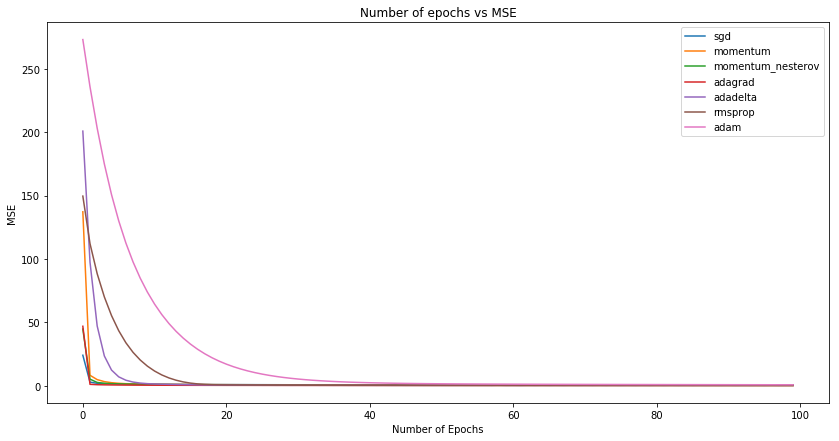

In [183]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize = (14, 7))
def plot1(val1,val2,val3,val4,val5,val6,val7):
    plt.plot(list(range(100)),val1)
    plt.plot(list(range(100)),val2)
    plt.plot(list(range(100)),val3)
    plt.plot(list(range(100)),val4)
    plt.plot(list(range(100)),val5)
    plt.plot(list(range(100)),val6)
    plt.plot(list(range(100)),val7)
    plt.title("Number of epochs vs MSE")
    plt.xlabel("Number of Epochs")
    plt.ylabel("MSE")
    plt.legend(['sgd', 'momentum', 'momentum_nesterov','adagrad','adadelta','rmsprop','adam'], loc='upper right')
    plt.show()
plot1(val1,val2,val3,val4,val5,val6,val7)

##### For the specified hyperparameters, adagrad performs the best as the fall from higher value to near zero happens almost instantaniosly. This can be seen even for momentum without nestrov.

### Analysis of Hyperparameters

In [203]:
matplotlib.rc('figure', figsize = (14, 7))
def plot_data(val1,labels,title,xlabel,ylabel):    
    for i in val1:
        plt.plot(list(range(100)),i)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels, loc='upper right')
    plt.show()

In [201]:
lr_list = [0.00001,0.0001,0.001,0.01]
lr_sgd = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("sgd", lr = i)
    lr_sgd.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)

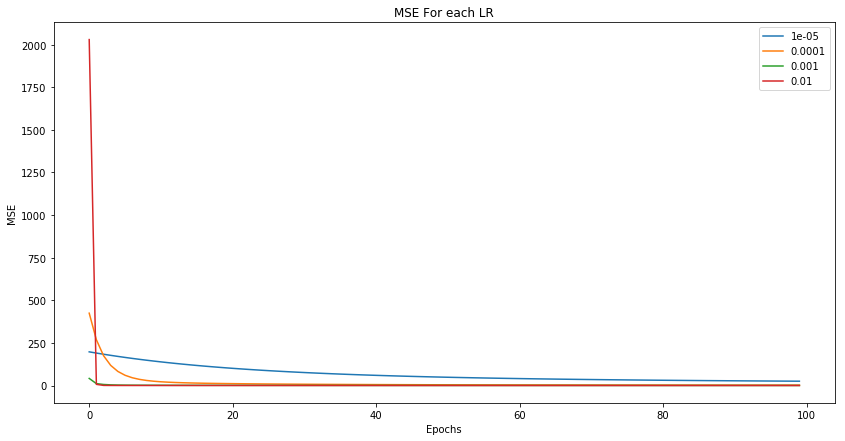

In [207]:
plot_data(lr_sgd,lr_list,"MSE For each LR","Epochs","MSE")

In [205]:
lr_list = [0.00001,0.0001,0.001,0.01]
lr_momentum = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("momentum", lr = i, mntm = 0.95, nesterov = False)
    lr_momentum.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)

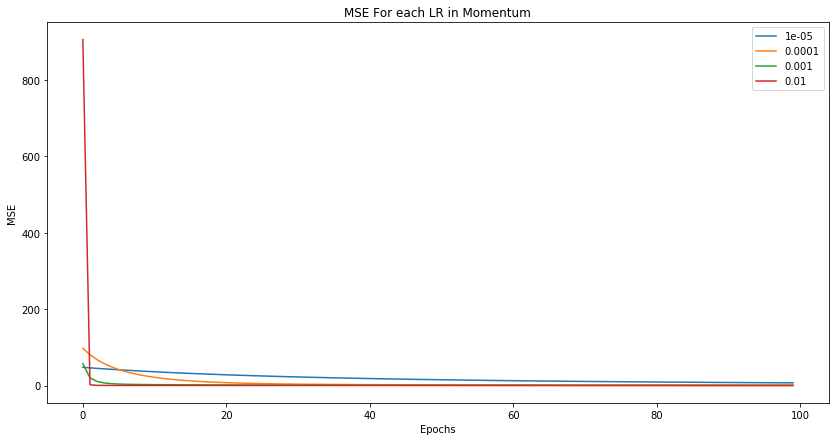

In [208]:
plot_data(lr_momentum,lr_list,"MSE For each LR in Momentum","Epochs","MSE")

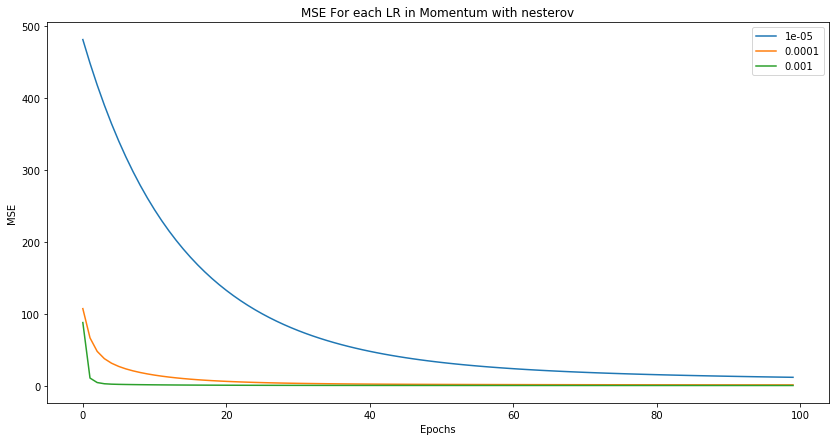

In [296]:
lr_list = [0.00001,0.0001,0.001]
lr_momentum_nesterov = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("momentum", lr = i, mntm = 0.95, nesterov = True)
    lr_momentum_nesterov.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(lr_momentum_nesterov,lr_list,"MSE For each LR in Momentum with nesterov","Epochs","MSE")

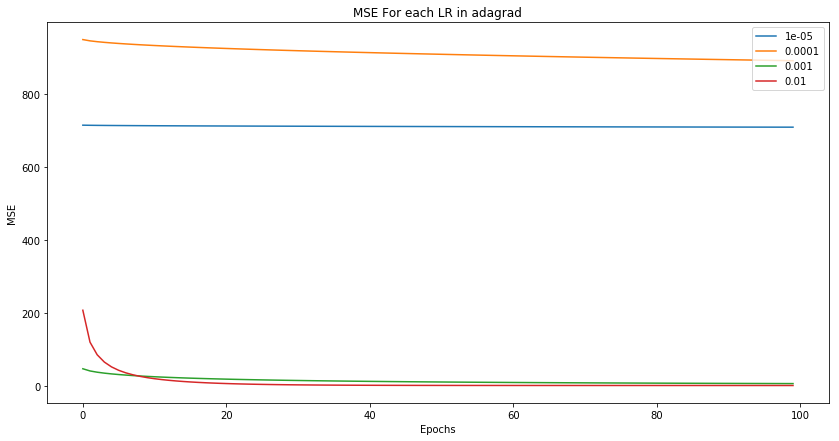

In [217]:
lr_list = [0.00001,0.0001,0.001,0.01]
lr_momentum_adagrad = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adagrad", lr = i, eps = 1e-06)
    lr_momentum_adagrad.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(lr_momentum_adagrad,lr_list,"MSE For each LR in adagrad","Epochs","MSE")

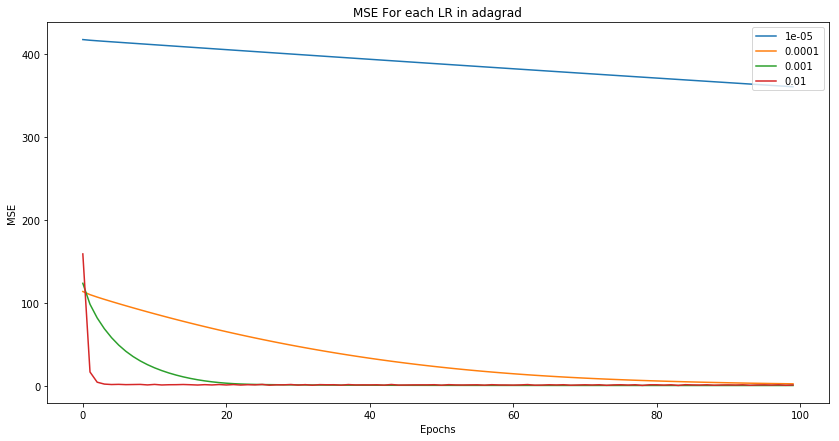

In [281]:
lr_list = [0.00001,0.0001,0.001,0.01]
lr_momentum_rmsprop = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("rmsprop", lr = i, rho = 0.9, eps = 1e-06)
    lr_momentum_rmsprop.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(lr_momentum_rmsprop,lr_list,"MSE For each LR in adagrad","Epochs","MSE")

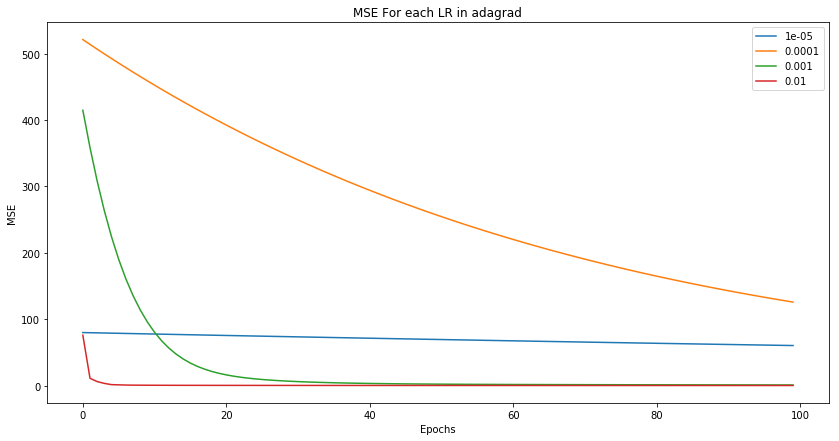

In [283]:
lr_list = [0.00001,0.0001,0.001,0.01]
lr_momentum_adam = []
for i in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adam", lr = i, beta1 = 0.9, beta2 = 0.999, eps = 1e-04)
    lr_momentum_adam.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(lr_momentum_adam,lr_list,"MSE For each LR in adagrad","Epochs","MSE")

#### Best MSE for each optimiser:
1. sgd = 0.01
2. momentum without nesterov = 0.01
3. momentum with nesterov = 0.001
4. adagrad = 0.01
5. rmsprop = 0.01
6. adam = 0.01

###### It can be seen that for most of the optimisers lr value of 0.01 would be the best learning rate as the slope is high at this value.

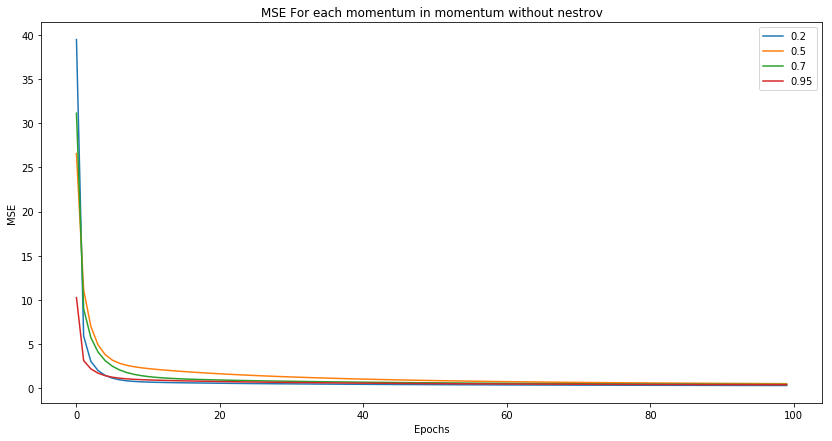

In [278]:
mntm_list = [0.2,0.5,0.7,0.95]
mntm_momentum = []
for i in mntm_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("momentum", lr = 0.001, mntm = i, nesterov = False)
    mntm_momentum.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(mntm_momentum,mntm_list,"MSE For each momentum in momentum without nestrov","Epochs","MSE")   

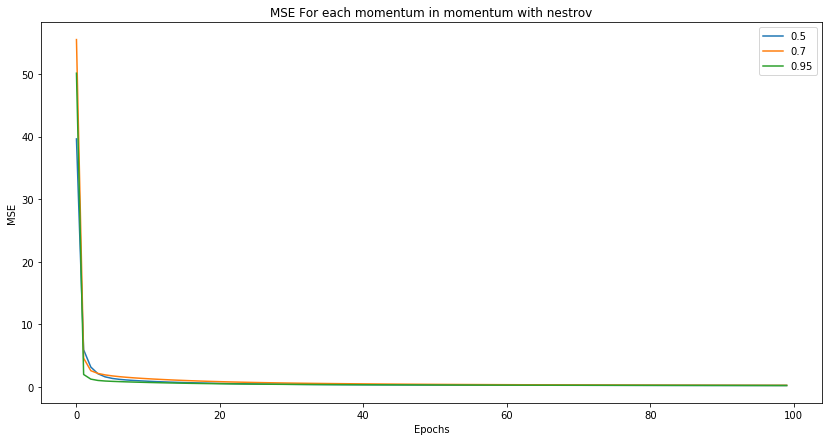

In [279]:
mntm_list = [0.5,0.7,0.95]
mntm_momentum = []
for i in mntm_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("momentum", lr = 0.001, mntm = i, nesterov = True)
    mntm_momentum.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(mntm_momentum,mntm_list,"MSE For each momentum in momentum with nestrov","Epochs","MSE")   

#### It can be seen for momentum that the value of 0.95 is the best amongst all the values as the slope is the highest here. The decent is almost immediate in both the cases.

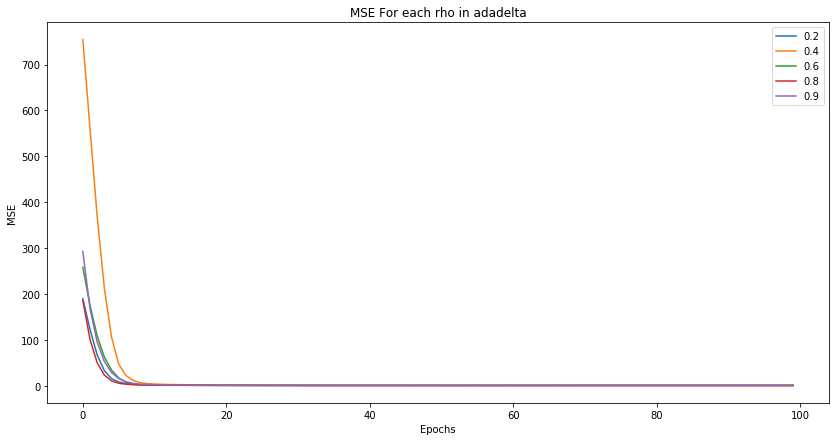

In [286]:
rho_list = [0.2,0.4,0.6,0.8,0.9]
rho_momentum_adadelta = []
for i in rho_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adadelta", rho = i, eps = 1e-06)
    rho_momentum_adadelta.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(rho_momentum_adadelta,rho_list,"MSE For each rho in adadelta","Epochs","MSE")

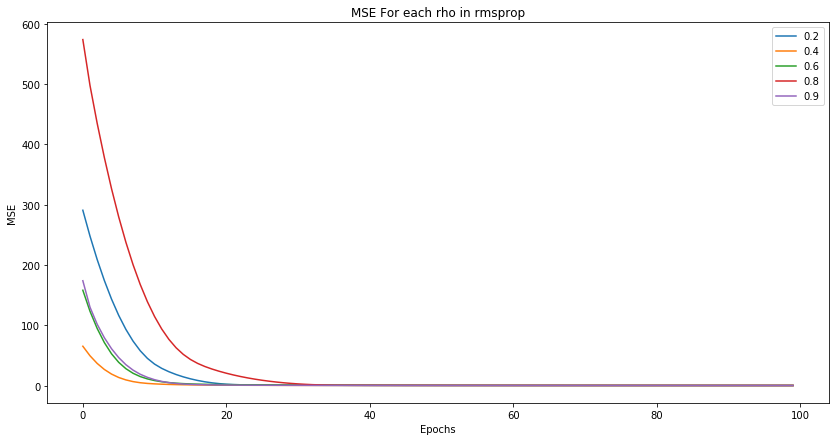

In [289]:
rho_list = [0.2,0.4,0.6,0.8,0.9]
rho_momentum_adadelta = []
for i in rho_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("rmsprop", lr = 0.001, rho = i, eps = 1e-06)
    rho_momentum_adadelta.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(rho_momentum_adadelta,rho_list,"MSE For each rho in rmsprop","Epochs","MSE")

###### There is not much change in the MSE as the rho value is varied. The slope of MSE values for all the values of rho is mostly similar. Although 0.9 shows a little higher slope in both the graphs. That would be the best value to use.

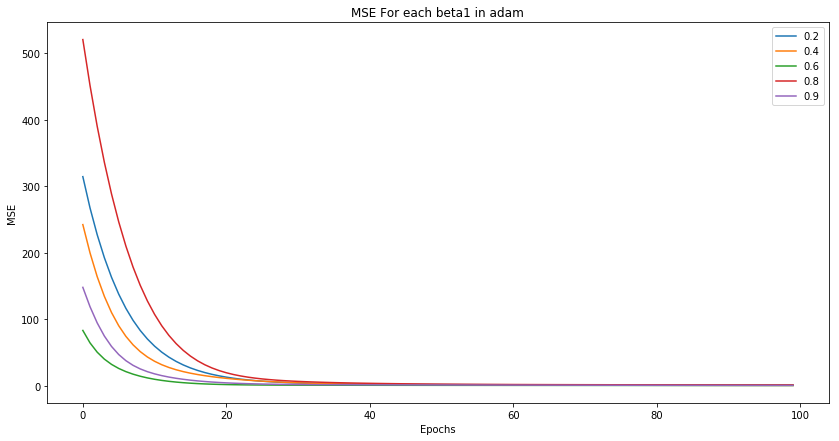

In [298]:
beta1_list = [0.2,0.4,0.6,0.8,0.9]
beta1_momentum_adam = []
for i in beta1_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adam", lr = 0.001, beta1 = i, beta2 = 0.999, eps = 1e-04)
    beta1_momentum_adam.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(beta1_momentum_adam,beta1_list,"MSE For each beta1 in adam","Epochs","MSE")

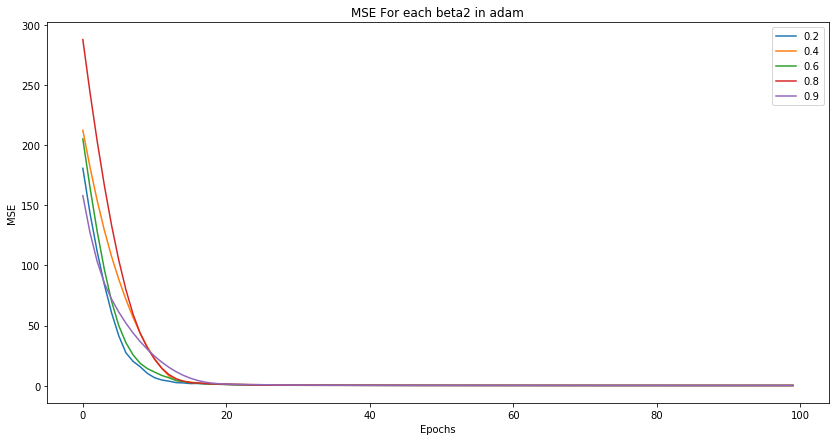

In [301]:
beta2_list = [0.2,0.4,0.6,0.8,0.9]
beta2_momentum_adam = []
for i in beta2_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adam", lr = 0.001, beta1 = 0.9, beta2 = i, eps = 1e-04)
    beta2_momentum_adam.append(train(model, X, y, 100, 100, opt))
    del(model)
    del(opt)
plot_data(beta2_momentum_adam,beta2_list,"MSE For each beta2 in adam","Epochs","MSE")

###### There is not much change in the MSE as both the beta values are varied. The slope of MSE values for all the values of beta are mostly similar.